# The Wilson-Cowan Single Node Model

In [7]:
# change to the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import scipy
import neurolib.utils.devutils as du

from neurolib.models.wc import WCModel

import neurolib.utils.loadData as ld
import neurolib.utils.functions as func
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200

# a nice color map
plt.rcParams['image.cmap'] = 'magma'

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

from matplotlib import rc
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)


In [10]:
import neurolib.utils.functions as func

wc = WCModel()
# control model parameters
wc.params['duration'] =  200
wc.params['exc_ext'] = 1.14
wc.params['c_excinh'] = 10.33
wc.params['c_inhexc'] = 9.67
wc.params['c_inhinh'] = 0
wc.params['K_gl'] = 0.6
wc.params['sigma_ou'] = 0
wc.run()

exc_tc = wc.outputs.exc[0,:]

frs, powers = func.getPowerSpectrum(
    exc_tc,
    wc.params["dt"],
)

wc_scz= WCModel()
# control model parameters
wc_scz.params['duration'] =  200
wc_scz.params['exc_ext'] = 1.25
wc_scz.params['c_excinh'] = 10.1
wc_scz.params['c_inhexc'] = 9.55
wc_scz.params['c_inhinh'] = 0
wc_scz.params['K_gl'] = 0.6
wc_scz.params['sigma_ou'] = 0
wc_scz.run()

exc_tc_scz = wc_scz.outputs.exc[0,:]

frs_scz, powers_scz = func.getPowerSpectrum(
    exc_tc_scz,
    wc_scz.params["dt"],
)

/Users/pamirozsuna/opt/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 10000 is greater than input length  = 2000, using nperseg = 2000
  .format(nperseg, input_length))


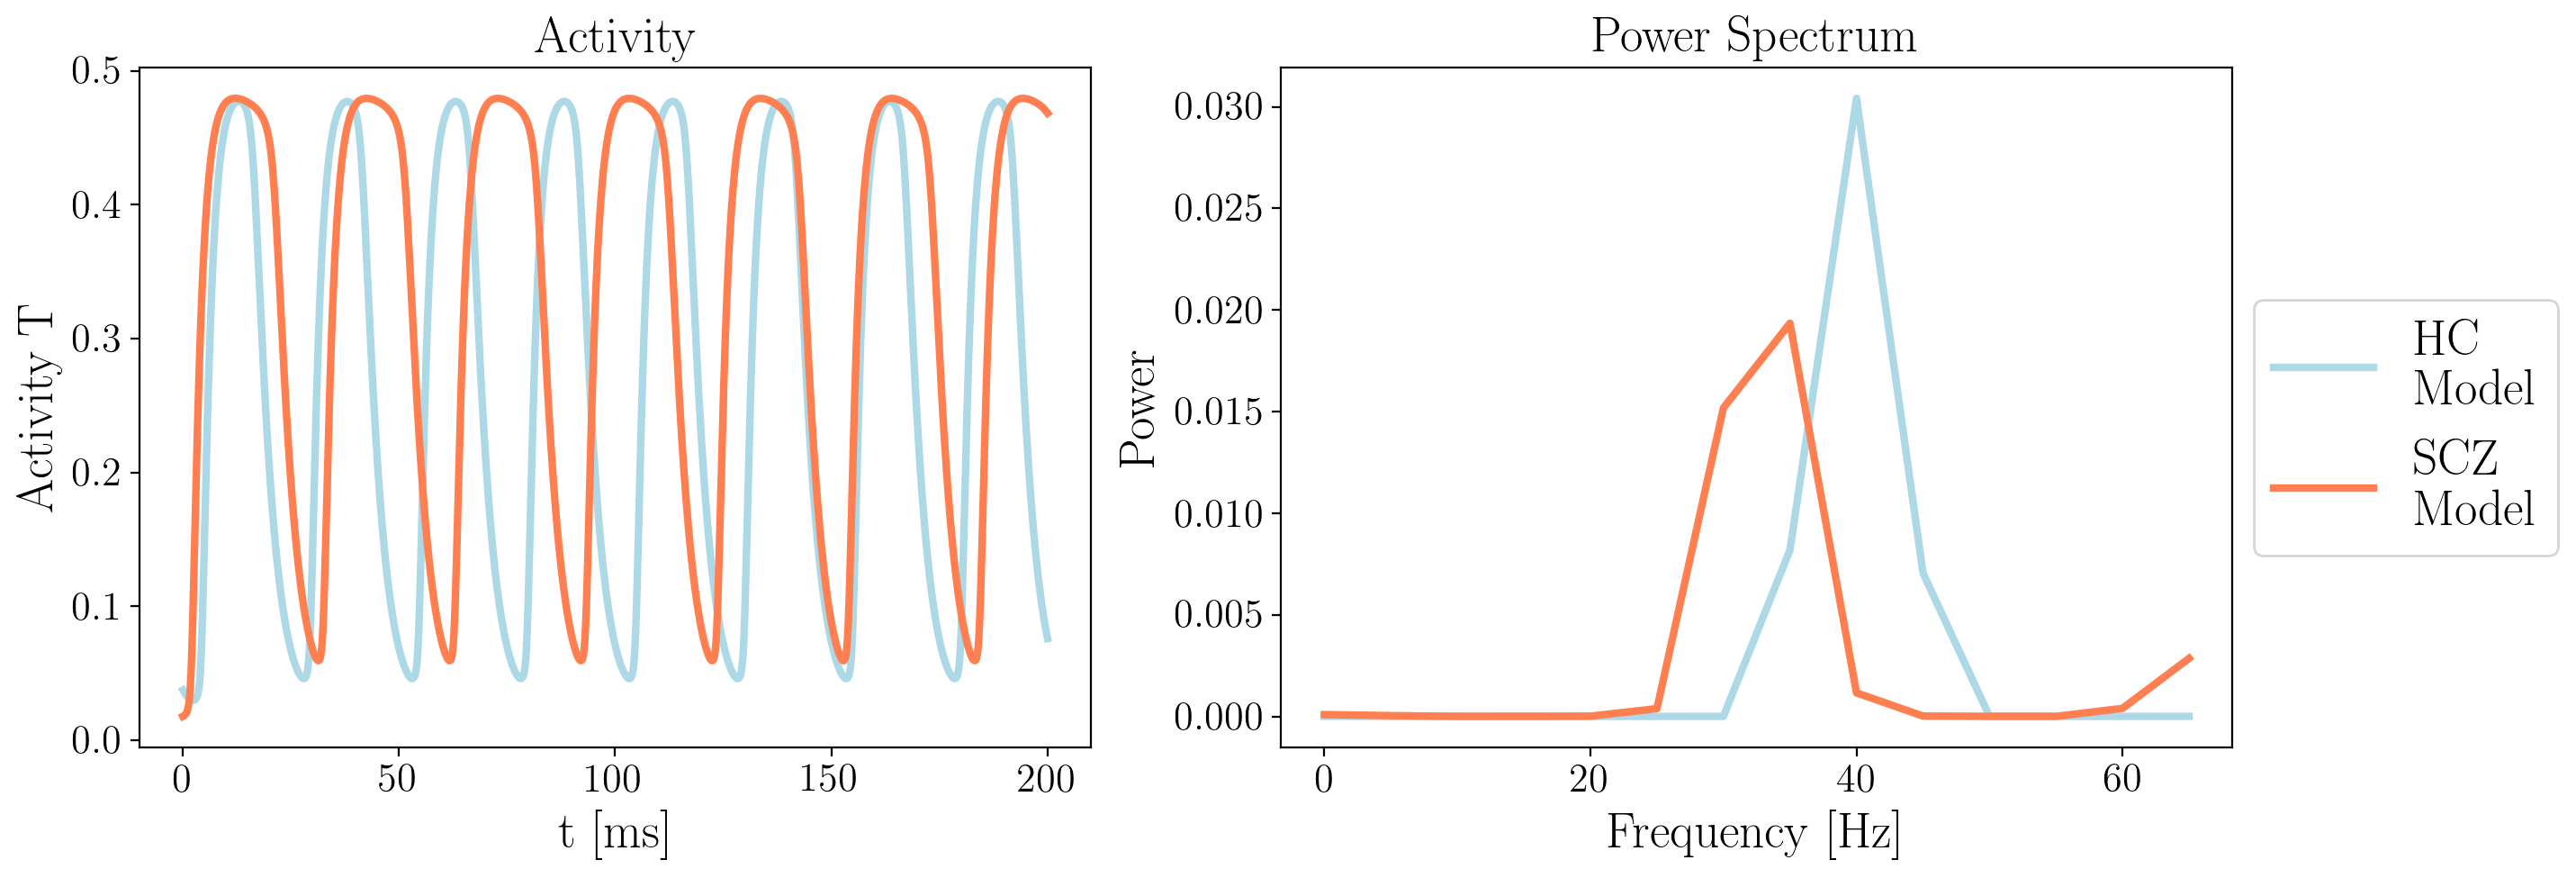

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(wc.t, wc.inh.T, c="lightblue", linewidth=3.0)
axs[0].plot(wc_scz.t, wc_scz.inh.T, c="coral", linewidth=3.0)
axs[0].set_title("Activity",fontsize=20)
axs[0].set_xlabel("t [ms]",fontsize=20)
axs[0].set_ylabel("Activity T", fontsize=20)
axs[1].plot(frs, powers, label="HC\nModel",  c="lightblue", linewidth=3.0)
axs[1].plot(frs_scz, powers_scz, label="SCZ\n Model",  c="coral",linewidth=3.0)
axs[1].set_title("Power Spectrum", fontsize=20)
axs[1].set_xlabel("Frequency [Hz]", fontsize=20)
axs[1].set_ylabel("Power", fontsize=20)

#plt.plot(x, y1, "-b", label="sine")
#plt.plot(x, y2, "-r", label="cosine")

fig.legend(bbox_to_anchor=(1.03, 0.65), fontsize=20)